In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

Using Theano backend.


In [1]:
import datetime as dt

In [3]:
start = dt.date(2013, 9, 20)

In [4]:
end = dt.date(2017, 9, 19)

In [5]:
spy = pdr.DataReader('SPY', 'yahoo', start, end)

In [6]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-09-20,172.330002,172.330002,170.580002,170.720001,157.500931,132867100
2013-09-23,170.490005,170.649994,169.389999,169.929993,156.772095,104616500
2013-09-24,169.899994,170.529999,169.210007,169.529999,156.403091,106333100
2013-09-25,169.639999,169.979996,168.889999,169.039993,155.951004,117306500
2013-09-26,169.320007,170.169998,169.050003,169.690002,156.550705,77146900


In [7]:
spy.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-13,249.720001,250.210007,249.589996,250.169998,248.934601,59228000
2017-09-14,249.800003,250.320007,249.600006,250.089996,248.854996,95446300
2017-09-15,248.690002,249.289993,248.570007,249.190002,249.190002,95432400
2017-09-18,249.610001,250.119995,249.279999,249.720001,249.720001,46235200
2017-09-19,250.000000,250.070007,249.600006,249.970001,249.970001,47108100


In [8]:
data = spy.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

In [9]:
data = data.rename(columns={'Adj Close': 'SPY'})

In [10]:
data.head()

,SPY
Date,
2013-09-20,157.500931
2013-09-23,156.772095
2013-09-24,156.403091
2013-09-25,155.951004
2013-09-26,156.550705


In [11]:
type(data)

pandas.core.frame.DataFrame

In [12]:
yt_1 = data.shift(1)

In [13]:
yt_2 = data.shift(2)

In [14]:
yt_3 = data.shift(3)

In [15]:
yt_4 = data.shift(4)

In [16]:
yt_5 = data.shift(5)

In [17]:
d1 = pd.concat([data,yt_1,yt_2,yt_3,yt_4,yt_5], axis=1)

In [18]:
d1.head()

,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2013-09-20,157.500931,NaN,NaN,NaN,NaN,NaN
2013-09-23,156.772095,157.500931,NaN,NaN,NaN,NaN
2013-09-24,156.403091,156.772095,157.500931,NaN,NaN,NaN
2013-09-25,155.951004,156.403091,156.772095,157.500931,NaN,NaN
2013-09-26,156.550705,155.951004,156.403091,156.772095,157.500931,NaN


In [19]:
d1.columns = ['yt','yt_1','yt_2','yt_3','yt_4','yt5']

In [20]:
d1.head()

,yt,yt_1,yt_2,yt_3,yt_4,yt5
Date,,,,,,
2013-09-20,157.500931,NaN,NaN,NaN,NaN,NaN
2013-09-23,156.772095,157.500931,NaN,NaN,NaN,NaN
2013-09-24,156.403091,156.772095,157.500931,NaN,NaN,NaN
2013-09-25,155.951004,156.403091,156.772095,157.500931,NaN,NaN
2013-09-26,156.550705,155.951004,156.403091,156.772095,157.500931,NaN


In [21]:
d1 = d1.dropna()

In [22]:
y = d1['yt']

In [23]:
cols = ['yt_1','yt_2','yt_3','yt_4','yt5']

In [24]:
x = d1[cols]

In [25]:
x.head()

,yt_1,yt_2,yt_3,yt_4,yt5
Date,,,,,
2013-09-27,156.550705,155.951004,156.403091,156.772095,157.500931
2013-09-30,155.831100,156.550705,155.951004,156.403091,156.772095
2013-10-01,155.000748,155.831100,156.550705,155.951004,156.403091
2013-10-02,156.227814,155.000748,155.831100,156.550705,155.951004
2013-10-03,156.080200,156.227814,155.000748,155.831100,156.550705


In [26]:
scaler_x = preprocessing.MinMaxScaler(feature_range=(-1, 1))

In [27]:
x = np.array(x).reshape((len(x), 5))

In [28]:
x = scaler_x.fit_transform(x)

In [29]:
scaler_y = preprocessing.MinMaxScaler(feature_range=(-1, 1))

In [30]:
y = np.array(y).reshape((len(y), 1))

In [31]:
y = scaler_y.fit_transform(y)

In [32]:
len(d1)

1002

In [33]:
len(x)

1002

In [34]:
1002 * .95

951.9

In [35]:
train_end = 952

In [36]:
x_train = x[0:train_end,]

In [37]:
x_test = x[train_end+1:1002,]

In [38]:
y_train = y[0:train_end]

In [39]:
y_test = y[train_end+1:1002]

In [40]:
x_train = x_train.reshape(x_train.shape + (1,))

In [41]:
x_test = x_test.reshape(x_test.shape + (1,))

In [42]:
seed=2016

In [43]:
np.random.seed(seed)

In [44]:
fit1 = Sequential()

In [45]:
fit1.add(LSTM(units=4, stateful=True, batch_input_shape=(1,5,1), activation='tanh', recurrent_activation='hard_sigmoid'))

In [46]:
fit1.add(Dense(units=1, activation='linear'))

In [47]:
fit1.compile(loss='mean_squared_error', optimizer='rmsprop')

In [48]:
end_point = len(x_train)

In [49]:
start_point = end_point-100

In [50]:
for i in range(len(x_train[start_point:end_point])):
    print('Fitting example ', i)
    fit1.fit(x_train[start_point:end_point], y_train[start_point:end_point], epochs=1, batch_size=1, verbose=2, shuffle=True)
    fit1.reset_states()

Fitting example  0
Epoch 1/1
0s - loss: 0.0025
Fitting example  1
Epoch 1/1
0s - loss: 0.0027
Fitting example  2
Epoch 1/1
0s - loss: 0.0029
Fitting example  3
Epoch 1/1
0s - loss: 0.0026
Fitting example  4
Epoch 1/1
0s - loss: 0.0022
Fitting example  5
Epoch 1/1
0s - loss: 0.0023
Fitting example  6
Epoch 1/1
0s - loss: 0.0023
Fitting example  7
Epoch 1/1
0s - loss: 0.0020
Fitting example  8
Epoch 1/1
0s - loss: 0.0020
Fitting example  9
Epoch 1/1
0s - loss: 0.0020
Fitting example  10
Epoch 1/1
0s - loss: 0.0017
Fitting example  11
Epoch 1/1
0s - loss: 0.0019
Fitting example  12
Epoch 1/1
0s - loss: 0.0020
Fitting example  13
Epoch 1/1
0s - loss: 0.0018
Fitting example  14
Epoch 1/1
0s - loss: 0.0016
Fitting example  15
Epoch 1/1
0s - loss: 0.0017
Fitting example  16
Epoch 1/1
0s - loss: 0.0017
Fitting example  17
Epoch 1/1
0s - loss: 0.0019
Fitting example  18
Epoch 1/1
0s - loss: 0.0015
Fitting example  19
Epoch 1/1
0s - loss: 0.0018
Fitting example  20
Epoch 1/1
0s - loss: 0.0016
Fi

In [51]:
np.shape(x_test)

(49, 5, 1)

In [52]:
x_test[-1::]

array([[[ 1.        ],
        [ 1.        ],
        [ 0.99834618],
        [ 1.        ],
        [ 1.        ]]])

In [53]:
def make_forecast(model, look_back_buffer, timesteps):
    forecast_predict = np.empty((0, 1), dtype=np.float64)
    for _ in range(timesteps):
        # make prediction with lookback buffer
        cur_predict = model.predict(look_back_buffer)
        # add prediction to result
        forecast_predict = np.concatenate([forecast_predict, cur_predict], axis=0)
        # add new axis to prediction
        cur_predict = np.reshape(cur_predict, (cur_predict.shape[1], cur_predict.shape[0], 1))
        # remove oldest prediction from buffer
        look_back_buffer = np.delete(look_back_buffer, 0, axis=1)
        # concat buffer with newest prediction
        look_back_buffer = np.concatenate([look_back_buffer, cur_predict], axis=1)
    return forecast_predict

In [54]:
forecast_predict = make_forecast(model=fit1, look_back_buffer=x_test[-1::], timesteps=10)

In [55]:
np.shape(forecast_predict)

(10, 1)

In [56]:
forecast_predict = scaler_y.inverse_transform(np.array(forecast_predict).reshape((len(forecast_predict), 1)))

In [57]:
forecast_predict = np.ndarray.flatten(forecast_predict)

In [58]:
forecast_predict = pd.Series(forecast_predict)

In [59]:
data['prediction'] = np.nan

In [60]:
data.tail()

,SPY,prediction
Date,,
2017-09-13,248.934601,NaN
2017-09-14,248.854996,NaN
2017-09-15,249.190002,NaN
2017-09-18,249.720001,NaN
2017-09-19,249.970001,NaN


In [61]:
df2 = data

In [64]:
df2 = df2.reset_index()

In [65]:
df2.head()

,Date,SPY,prediction
0,2013-09-20,157.500931,NaN
1,2013-09-23,156.772095,NaN
2,2013-09-24,156.403091,NaN
3,2013-09-25,155.951004,NaN
4,2013-09-26,156.550705,NaN


In [66]:
df2.tail()

,Date,SPY,prediction
1002,2017-09-13,248.934601,NaN
1003,2017-09-14,248.854996,NaN
1004,2017-09-15,249.190002,NaN
1005,2017-09-18,249.720001,NaN
1006,2017-09-19,249.970001,NaN


In [67]:
samp = df2.loc[1006, 'Date']

In [68]:
samp

Timestamp('2017-09-19 00:00:00')

In [70]:
for i in range(1006, 1016):
    samp += dt.timedelta(days=1)
    df2.loc[len(df2), 'Date'] = samp

In [71]:
df2.tail()

,Date,SPY,prediction
1012,2017-09-25,NaN,NaN
1013,2017-09-26,NaN,NaN
1014,2017-09-27,NaN,NaN
1015,2017-09-28,NaN,NaN
1016,2017-09-29,NaN,NaN


In [74]:
df2['prediction'][1007:] = forecast_predict

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
df2 = df2.set_index('Date')

In [78]:
df2.plot(figsize=(9,9))

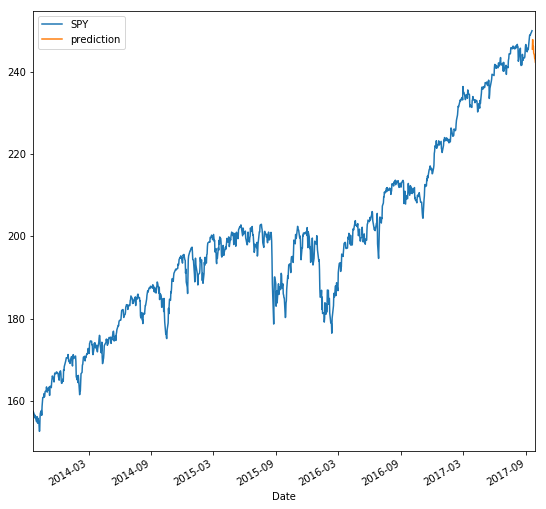

In [79]:
plt.show()

In [81]:
df2.tail(n=12)

,SPY,prediction
Date,,
2017-09-18,249.720001,NaN
2017-09-19,249.970001,NaN
2017-09-20,NaN,245.512782
2017-09-21,NaN,247.817081
2017-09-22,NaN,245.437452
2017-09-23,NaN,246.210742
2017-09-24,NaN,244.525732
2017-09-25,NaN,244.325328
2017-09-26,NaN,244.029275
